## Predicción de ingresos

### Incluye:

- Análisis exploratorio de estado de la data.

- Limpieza de data.

- Análisis descriptivo general de variables latentes.

- Recodificación y manipulación de data.

- Modelación econométrica.

- Análisis teórico desde la econometría, incluyendo estadísticas y parámetros.

- Modelación desde el machine learning para generar modelo de prodicciones. 

- Conclusiones respecto al modelo.

> **Data ficticia** 

### Problema y herramientas de medición. 

Objetivamente, el problema se basa en intentar predecir si un individuo X percibe Y cantidad de ingresos, determinados por una serie de factores socioeconomicos.

Se pleanteará un **modelo predictivo de clasificación** desde machine learning. Lo anterior es debido a que el vector objetivo se clasificará en solo 2 valores (binarios 0;1) para determinar si el individuo obtiene de ingresos más de 50.000 USD o menos de 50.000 USD.

### Uso de Métricas de desempeño

■ **Curva Roc y área:** Se utilizara para conocer el rendimiento global del modelo, como tambien para poder comparar 2 o más modelos dentro de una gráfica, con el objetivo adicional de conocer el area bajo la curva. 

■ **Accuracy:** Para medir el porcentaje de los casos acertados. Solo como medida teórica ya que debe ser analizada con mas profundiad. 

■ **Precision:** Se utilizará para conocer la cantidad de falsos positivos que puede entregar el modelo y asu vez conocer el % de verdaderos positivos, que es lo que importa del modelo, en otras palabras, para medir la calidad del modelo

■ **Recall:** Ligado el punto anterior, pero más profundamente, para medir la cantidad de totales positivos que el modelo es capaz de entregar. 

■ **F1:** Resultado de combinar las 2 anteriores. Se utilizará para ser mas preciso en el resultado y medir el rendimiento del modelo, la precisión y la exahustividad. 

■ **Summary:** Herramienta de resumen estadístico y econométrico que será utilizada como guía general y resumida de cada cálculo o reconversión para llevar un control de los cambios relevantes sobre las variables, como tambien su aporte al modelo.








###  Uso de Librerías para preprocesamiento, visualización y modelación.

**■ Python:** Lenguaje para codificar, modelar y procesar el ensayo que se realizará. V. 3.9.13 

**■ Pandas:** Para visualizar, modelar, modificar y medir un Data Frame. V.1.5.0

**■ Numpy:** (utilizada implicitamente por Pandas) permitirá inspeccionar arrays generados, analizar tipo de data. V.1.23.3

**■ Seaborn:** Utilizada para generar gráficas. V. 0.11.2

**■ Matplotlib** Utilizada para generar gráficas. V. 3.5.2 

**■ Sklearn:** Utilizada para generar gráficas y regresion logística. V. 1.0.2

**■ StatsModels:** Utilizada para generar modelo de ML de clasificación. V. 0.13.2

**■ Warnings:** Para esconder alertas asociadas a versiones.






### Proceso de preprocesamiento y recodificación de datos.

Para el **pre-procesamiento**, se realizará primero la visualización general de la data para conocer el estado de la misma.

Principalmente se evaluará:

- Encoding correcto
- Cantidad de filas y columnas utilizando herramientas de la libreria Pandas (PD, head, values, etc).
- Cantidad de datos nulos/blancos / carácteres inválidos / columnas que no son vector (índices automáticos u otros valores no significantes)
- Cantidad de datos nulos/blancos 
- Uniformidad de las unidades de medida y tipo de datos (Por ejemplo que una categoría llamada ingresos en CLP posea filas con separación de miles con comas, puntos, símbolos de dinero, entre otros). Verificar si data es string, int, float, object.
- Visualización gráfica de diferentes columnas, utilizando seaborn para gráficas rápidas.

#### Recodificación de datos.

- Codificación numérica: Toda la data se deberá evaluar con clasificación numérico ya que se realizarán cálculos matemáticos. (por ejemplo vector "pais", reducirlo  a  "continente"  y "continente" se podría representar con números según corresponda su clasificación).


- Codificacion binaria categórica: Con el objeto de crear un modelo de regresión logistica ajustada con la menor cantidad de vectores, el modelo agradecerá que los vectores categóricos sean clasificados en una variable binaria, ya que estadísticamente es más preciso realizar predicciones cuando existen menos categorías que entrenar que cuando hay más (Bayes.) . Lo anterior es porque se proyectará un suceso debido a la situación X o Y (de un vector del modelo) y no a las situaciones X, Y o Z (del mismo vector).





**● Elementos a considerar**

    ○ La inspección visual del vector objetivo.

    ○ La inspección visual de las variables.

    ○ La inspección de datos perdidos en las variables. 

    ○ De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [1]:
#Importación de librerias comenzar a manipular los datos

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import funciones as func

In [2]:
# Se importa el Data frame y señalo de inmediato los valores nulos
df = pd.read_csv("income-db.csv", na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


**La inspección de datos perdidos en las variables**

In [3]:
#Se inspeccionan los datos nulos del DF y se eliminan 
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [4]:
df_original = df
df = df.dropna()
df.shape

(45222, 15)

In [5]:
#Inspección general del Data Frame objetivo
print(f' Total De filas con Nulos DataFrame original:', df_original.shape[0])
print(f' Total De filas con valores nulos eliminados:', df.shape[0])
print(f' Total filas de nulos eliminados:' , df_original.shape[0] -df.shape[0])

 Total De filas con Nulos DataFrame original: 48842
 Total De filas con valores nulos eliminados: 45222
 Total filas de nulos eliminados: 3620


***La Recodificación de columnas***

In [6]:
#Recodificaciones de clases. 

# Dictaminé que los registros "Columbia" y "South" corresponden a "Colombia" y a "South Korea" respectivamente 

# sin embargo, en un caso real es imperativo consultar al cliente o al team leader respecto a datos que no han sido
#clasificados

occ_recod = {'white-collar':['Prof-specialty', 'Exec-managerial',  'Adm-clerical', 'Sales', 'Tech-support'],
                    'blue-collar':['Craft-repair', 'Machine-op-inspct', 'Transport-moving','Handlers-cleaners',
                                     'Farming-fishing', 'Protective-serv' ,'Priv-house-serv'],
                    'others': ['Other-service', 'Armed-Forces']}


workclass_recod = {'federal-gov': ['Federal-gov'],
                           'state-level-gov':['State-gov' , 'Local-gov'],
                           'self-employed' :[ 'Self-emp-inc', 'Self-emp-not-inc'],
                           'unemployed' :['Never-worked', 'Without-pay']}

                           
education_recod = {'preschool':[ 'Preschool'],
                   'elementary-school': ['1st-4th', '5th-6th'],
                   'high-school':['7th-8th', '9th', '10th','11th', '12th', 'HS-grad'],
                    'college': ['Assoc-voc', 'Assoc-acdm', 'Some-college'],
                    'university':['Bachelors', 'Masters', 'Prof-school', 'Doctorate']}
                   
civstatus_recod = {'married' :['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
                 'divorced' :['Divorced'],
                 'separated':['Separated'],
                  'widowed' :['Widowed']}

region_recod = {'america':['United-States','Puerto-Rico','Guatemala','Jamaica','Mexico','Dominican-Republic','Peru','Haiti',
                             'Canada','El-Salvador','Cuba','Nicaragua','Ecuador', 'Columbia',
                              'Outlying-US(Guam-USVI-etc)','Honduras','Trinadad&Tobago'],
                'europe' :['Scotland','England','Poland','Germany','Portugal','Italy','Yugoslavia','Ireland',
                             'Hungary','France','Holand-Netherlands','Greece'],
                'asia' :['Laos','Philippines','Vietnam','Japan','India','Hong','Cambodia','Taiwan','China','asia','Thailand','Iran', 'South']}     

  
        

In [7]:
#Se ingresan los datos recodificados mediante la funcion recodificar, contenida en el import de "funciones.py"

df['occupation'] = func.recodificar(df, 'occupation', occ_recod)
df['workclass'] = func.recodificar(df, 'workclass', workclass_recod)
df['marital-status'] = func.recodificar(df, 'marital-status', civstatus_recod)
df['education'] = func.recodificar(df, 'education', education_recod)
df['native-country'] = func.recodificar(df, 'native-country', region_recod)

In [8]:
#Se reemplazan los nombres de las columnas recodificadas y se verifica su correcta definicion.

df.rename(columns = {'occupation':'collars'}, inplace = True)
df.rename(columns = {'workclass':'workclass_recod'}, inplace = True)
df.rename(columns = {'marital-status':'civstatus_recod'}, inplace = True)
df.rename(columns = {'education':'education_recod'}, inplace = True)
df.rename(columns = {'native-country': 'region_recod'}, inplace = True)
df.rename(columns = {'income': 'income_recod'}, inplace = True)

#Recodifico el V.O a binario con np.where
df["income_recod"] = np.where(df["income_recod"] == "<=50K", 0, 1)
df.head()


,age,workclass_recod,fnlwgt,education_recod,educational-num,civstatus_recod,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region_recod,income_recod
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,america,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,america,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,america,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,america,1
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,america,0


*** La inspección visual de las variables. (4 puntos) ***

In [9]:
print('La ocupación que lidera el ser es "White Collar" con un 53%')

df['collars'].value_counts(normalize = True)



La ocupación que lidera el ser es "White Collar" con un 53%


white-collar    0.538676
blue-collar     0.354695
others          0.106630
Name: collars, dtype: float64

In [10]:
print('Las personas casadas lideran el vector con un 47,8%')
df['civstatus_recod'].value_counts(normalize = True)



Las personas casadas lideran el vector con un 47,8%


married          0.478506
Never-married    0.322807
divorced         0.139246
separated        0.031202
widowed          0.028238
Name: civstatus_recod, dtype: float64

In [11]:
print('La mayoria de las personas son trabajadores dependientes con un 73,6%')
df['workclass_recod'].value_counts(normalize = True)



La mayoria de las personas son trabajadores dependientes con un 73,6%


Private            0.736522
self-employed      0.120340
state-level-gov    0.111583
federal-gov        0.031091
unemployed         0.000464
Name: workclass_recod, dtype: float64

In [12]:
print('más del 96% de las personas son de America')
df['region_recod'].value_counts(normalize = True)


más del 96% de las personas son de America


america    0.960882
asia       0.022799
europe     0.016319
Name: region_recod, dtype: float64

In [13]:
print('Las personas con educación secundaria son las que lideran el vector un un 43%')
df['education_recod'].value_counts(normalize = True)


Las personas con educación secundaria son las que lideran el vector un un 43%


high-school          0.435651
college              0.295542
university           0.252377
elementary-school    0.014838
preschool            0.001592
Name: education_recod, dtype: float64

In [14]:
#inspecciono que los vectores se encuentren correctamente codificados
df.dtypes

age                 int64
workclass_recod    object
fnlwgt              int64
education_recod    object
educational-num     int64
civstatus_recod    object
collars            object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
region_recod       object
income_recod        int32
dtype: object

***La inspección visual del VO (2 puntos)***

In [15]:
conteo = df['income_recod'].value_counts(normalize = True)
print("Al ser el vector objetivo una variable tipo binaria y sin tratar, no es conveniente graficar más que su distribución. Para ello se genera un resumen:\n")
print(f'Más del', conteo[0].round(4)*100 , '% (34.014)  de las personas posee un ingreso menor a 50.000 USD')
print(f'Solo el', conteo[1].round(3)*100 , '% (11.208)  de las personas posee un ingreso mayor a 50.000 USD')


Al ser el vector objetivo una variable tipo binaria y sin tratar, no es conveniente graficar más que su distribución. Para ello se genera un resumen:

Más del 75.22 % (34.014)  de las personas posee un ingreso menor a 50.000 USD
Solo el 24.8 % (11.208)  de las personas posee un ingreso mayor a 50.000 USD



La gráfica 1  "income" muestra la distribución de ingresos en el dataframe en cantidades de personas.
 Existe una clara tendencia general a tener ingresos menores a 50.000 USD (34.014 registros)


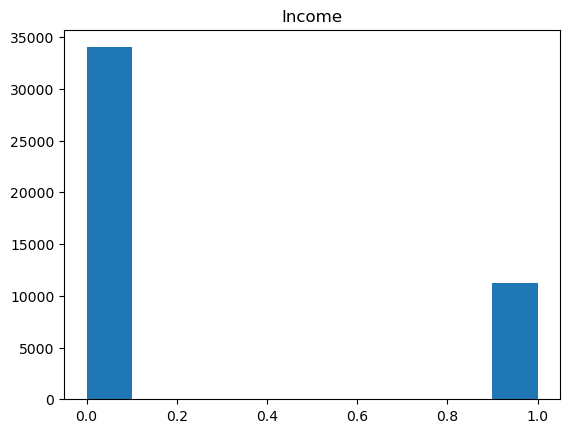

<Figure size 400x400 with 0 Axes>

In [16]:
plt.hist(df['income_recod']);
plt.title('Income');
plt.figure(figsize=(4,4));
print('\nLa gráfica 1  "income" muestra la distribución de ingresos en el dataframe en cantidades de personas.\n Existe una clara tendencia general a tener ingresos menores a 50.000 USD (34.014 registros)')

 Histograma de age
De acuerdo a la edad los datos se concentran entr los 20 y los 55 años, probablemente, 
porque es una edad donde se intuye que las personas inician-desarrollan-declinan la carrera laboral, 
lo que tiene sentido empírico. 


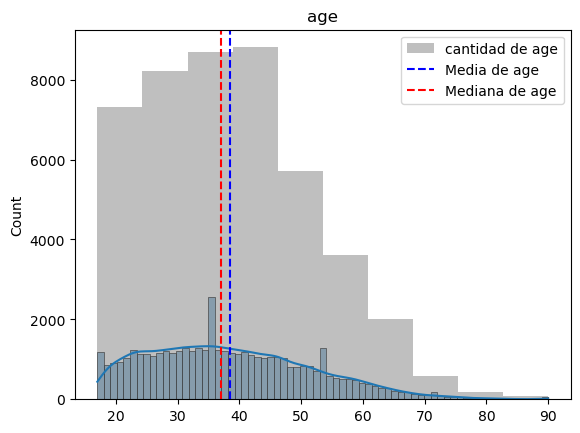

In [17]:
func.plot_hist(df,"age")
print("De acuerdo a la edad los datos se concentran entr los 20 y los 55 años, probablemente, \nporque es una edad donde se intuye que las personas inician-desarrollan-declinan la carrera laboral, \nlo que tiene sentido empírico. ")

La gráfica registros por tipo de trabajo muestra que el dominio y concentración de datos es liderado por "private"


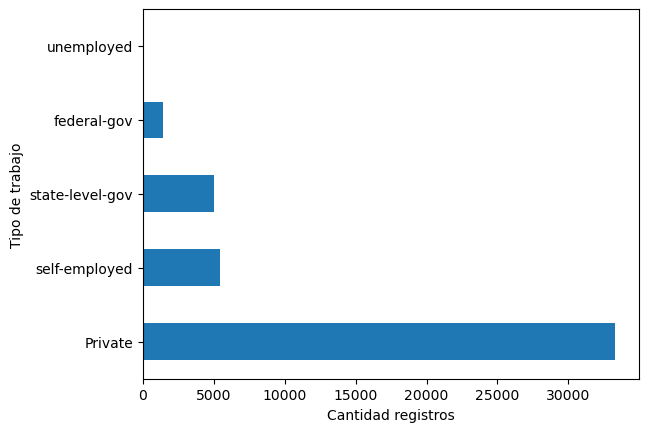

In [18]:
print('La gráfica registros por tipo de trabajo muestra que el dominio y concentración de datos es liderado por "private"')
df["workclass_recod"].value_counts().plot(kind="barh")
plt.ylabel("Tipo de trabajo")
plt.xlabel("Cantidad registros");


De acuerdo a la gráfica 2 , existe una clara tendencia en el genero masculino de percibir +50k.
La gráfica muestra la distribución de ingresos por continente


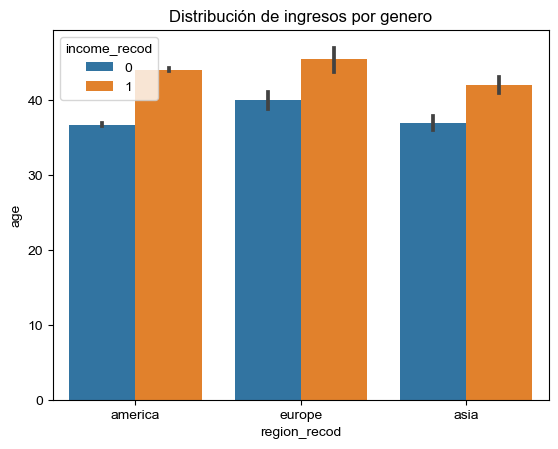

In [19]:
sns.barplot(x="region_recod", y="age", data=df, hue='income_recod').set(title='Distribución de ingresos por genero')
sns.set(style="whitegrid", palette ="deep")
print('\nDe acuerdo a la gráfica 2 , existe una clara tendencia en el genero masculino de percibir +50k.\nLa gráfica muestra la distribución de ingresos por continente')


De acuerdo a la gráfica , se muestra que en los 3 continentes el empleo público domina por sobre el privado en los ingresos


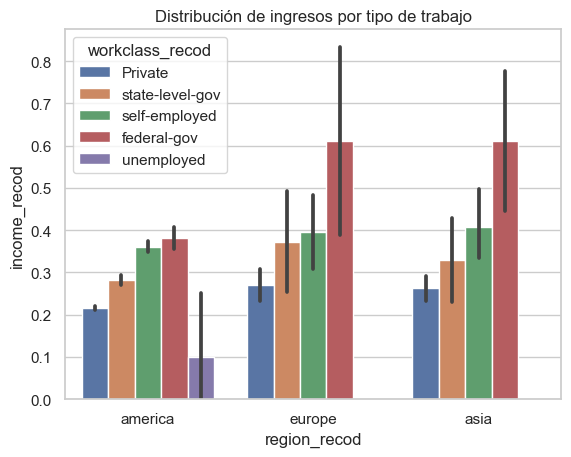

In [20]:
sns.barplot(x="region_recod", y="income_recod", data=df, hue='workclass_recod').set(title='Distribución de ingresos por tipo de trabajo')
sns.set(style="whitegrid", palette ="deep")
print('\nDe acuerdo a la gráfica , se muestra que en los 3 continentes el empleo público domina por sobre el privado en los ingresos')


¿Cómo se distribuyen los ingresos de acuerdo a la educación y el tipo de empleo?

se muestra que en los 3 continentes el empleo público continúa el dominio por sobre el privado en los ingresos, 
aún cuando en situaciones, el nivel educacional no es más que high school


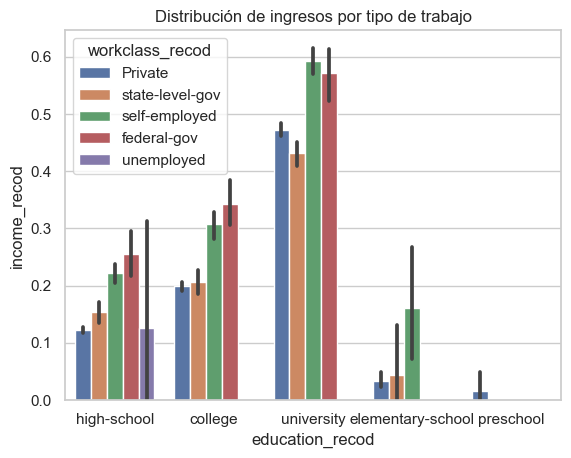

In [21]:
sns.barplot(x="education_recod", y="income_recod", data=df, hue='workclass_recod').set(title='Distribución de ingresos por tipo de trabajo')
sns.set(style="whitegrid", palette ="deep")
print('\n¿Cómo se distribuyen los ingresos de acuerdo a la educación y el tipo de empleo?')
print('\nse muestra que en los 3 continentes el empleo público continúa el dominio por sobre el privado en los ingresos, \naún cuando en situaciones, el nivel educacional no es más que high school')

Al graficar por continente el nivel educacional en funcion a la edad,se visualiza que a nivel general, america concentra la mayoria de datos


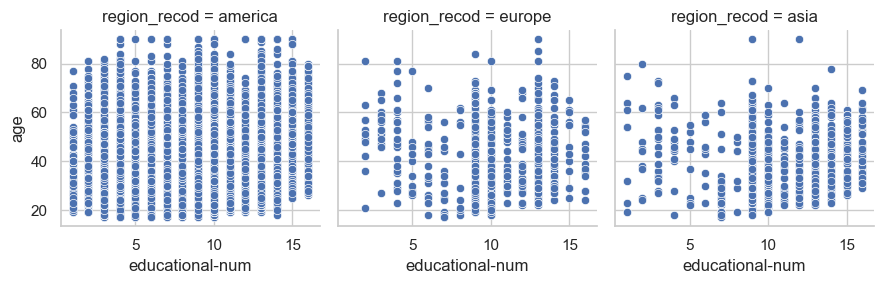

In [22]:
print('Al graficar por continente el nivel educacional en funcion a la edad,se visualiza que a nivel general, america concentra la mayoria de datos')
func.grouped_scatterplot_seaborn(df, "educational-num", "age", "region_recod")



#### Modelación descriptiva.

● Elementos a considerar en éste hito:

    ○ La modelación mediante regresión de ambos problemas.
    
    ○ La interpretación de los principales regresores en cada problema.
    
    ○ La definición de las estrategias de Modelación predictiva.
    


***○ La modelación mediante regresión de ambos problemas.

In [23]:
#Se genera dummies con el objeto de binarizar los vectores categóricos

df_dummies = pd.get_dummies(df, drop_first = True)
df = df_dummies


In [24]:
#Para reemplazar los caracteres '-' por '_' en todo el DF.

df.columns = df.columns.str.replace(r"[-]", "_")

In [25]:
#Remuevo el vector objetivo de las lista
vectores= list(df.columns)
vectores.remove('income_recod')

In [26]:
#Guardo los vectores en un objeto con condicion add (+) 

vectores_full=' + '.join(vectores) #total de regresores

modelo_full = smf.logit('income_recod ~'+ vectores_full , df).fit() # Primer modelo de regresión logistica.

modelo_full.summary2()

Optimization terminated successfully.
         Current function value: 0.331645
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.408     
Dependent Variable:       income_recod           AIC:                    30061.3311
Date:                     2022-11-23 12:28       BIC:                    30349.0693
No. Observations:         45222                  Log-Likelihood:         -14998.   
Df Model:                 32                     LL-Null:                -25322.   
Df Residuals:             45189                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           11.0000                                                  
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------------------
Intercept                         -8.6959   0.3014 -28.8520 0.0000  -9.2866 -8.1052
age                                0.0253   0.0014  18.6728 0.0000   0.0226  0.0279
fnlwgt                             0.0000   0.0000   5.2531 0.0000   0.0000  0.0000
educational_num                    0.2768   0.0160  17.2579 0.0000   0.2454  0.3083
capital_gain                       0.0003   0.0000  36.8937 0.0000   0.0003  0.0003
capital_loss                       0.0007   0.0000  21.3192 0.0000   0.0006  0.0007
hours_per_week                     0.0297   0.0013  22.4829 0.0000   0.0271  0.0323
workclass_recod_federal_gov        0.4456   0.0750   5.9419 0.0000   0.2986  0.5926
workclass_recod_self_employed     -0.3429   0.0422  -8.1197 0.0000  -0.4257 -0.2602
workclass_recod_state_level_gov   -0.0735   0.0459  -1.6017 0.1092  -0.1634  0.0164
workclass_recod_unemployed        -1.1019   0.8003  -1.3768 0.1686  -2.6705  0.4667
education_recod_elementary_school  0.1452   0.2372   0.6124 0.5403  -0.3196  0.6101
education_recod_high_school       -0.0648   0.0467  -1.3858 0.1658  -0.1564  0.0268
education_recod_preschool         -3.9733   4.0673  -0.9769 0.3286 -11.9452  3.9985
education_recod_university         0.0879   0.0608   1.4456 0.1483  -0.0313  0.2071
civstatus_recod_divorced           0.4875   0.0722   6.7489 0.0000   0.3459  0.6291
civstatus_recod_married            1.2946   0.1366   9.4786 0.0000   1.0269  1.5623
civstatus_recod_separated          0.4572   0.1345   3.3983 0.0007   0.1935  0.7208
civstatus_recod_widowed            0.5764   0.1326   4.3465 0.0000   0.3165  0.8363
collars_others                    -0.7289   0.0869  -8.3874 0.0000  -0.8992 -0.5585
collars_white_collar               0.6016   0.0354  17.0097 0.0000   0.5323  0.6709
relationship_Not_in_family        -0.9589   0.1338  -7.1661 0.0000  -1.2211 -0.6966
relationship_Other_relative       -1.4183   0.1871  -7.5801 0.0000  -1.7850 -1.0516
relationship_Own_child            -1.9398   0.1662 -11.6697 0.0000  -2.2656 -1.6140
relationship_Unmarried            -1.1899   0.1503  -7.9148 0.0000  -1.4845 -0.8952
relationship_Wife                  1.0600   0.0841  12.5991 0.0000   0.8951  1.2249
race_Asian_Pac_Islander            0.8007   0.2233   3.5867 0.0003   0.3632  1.2383
race_Black                         0.2628   0.1891   1.3898 0.1646  -0.1078  0.6335
race_Other                         0.2419   0.2719   0.8894 0.3738  -0.2911  0.7748
race_White                         0.5072   0.1797   2.8222 0.0048   0.1550  0.8595
gender_Male                        0.7806   0.0643  12.1451 0.0000   0.6546  0.9066
region_recod_asia                 -0.5129   0.1502  -3.4157 0.0006  -0.8072 -0.2186
region_recod_europe                0.2028   0.1057   1.9180 0.0551  -0.0044  0.4100
===================================================================================

"""

In [27]:
print('El modelo con todos los vectores, solo se ajustó en un 40% a la varianza con 32 regresores ')

El modelo con todos los vectores, solo se ajustó en un 40% a la varianza con 32 regresores 


In [28]:
#Se genera un modelo depurado con vectores significativos que son guardados en una lista . Pvalue <= 0.05

sig_table = modelo_full.summary2().tables[1]

col_sig = sig_table[sig_table['P>|z|'] <= 0.05].index.drop('Intercept').tolist() # Se guardan los vectores sig. en una lista

modelo_depurado = smf.logit(f'income_recod ~ {" + ".join(col_sig)}', data = df).fit()

modelo_depurado.summary2()

Optimization terminated successfully.
         Current function value: 0.331854
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Pseudo R-squared:     0.407     
Dependent Variable:      income_recod         AIC:                  30062.1611
Date:                    2022-11-23 12:28     BIC:                  30271.4252
No. Observations:        45222                Log-Likelihood:       -15007.   
Df Model:                23                   LL-Null:              -25322.   
Df Residuals:            45198                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          9.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -8.7137   0.1984 -43.9103 0.0000 -9.1026 -8.3247
age                            0.0252   0.0013  18.7420 0.0000  0.0226  0.0278
fnlwgt                         0.0000   0.0000   5.4522 0.0000  0.0000  0.0000
educational_num                0.2982   0.0072  41.5312 0.0000  0.2841  0.3123
capital_gain                   0.0003   0.0000  36.9137 0.0000  0.0003  0.0003
capital_loss                   0.0007   0.0000  21.3413 0.0000  0.0006  0.0007
hours_per_week                 0.0297   0.0013  22.5036 0.0000  0.0271  0.0323
workclass_recod_federal_gov    0.4554   0.0744   6.1176 0.0000  0.3095  0.6014
workclass_recod_self_employed -0.3313   0.0416  -7.9698 0.0000 -0.4127 -0.2498
civstatus_recod_divorced       0.4803   0.0721   6.6660 0.0000  0.3391  0.6215
civstatus_recod_married        1.2959   0.1364   9.5018 0.0000  1.0286  1.5632
civstatus_recod_separated      0.4488   0.1344   3.3396 0.0008  0.1854  0.7123
civstatus_recod_widowed        0.5674   0.1324   4.2847 0.0000  0.3078  0.8269
collars_others                -0.7234   0.0868  -8.3291 0.0000 -0.8936 -0.5531
collars_white_collar           0.6115   0.0350  17.4505 0.0000  0.5428  0.6802
relationship_Not_in_family    -0.9495   0.1336  -7.1065 0.0000 -1.2113 -0.6876
relationship_Other_relative   -1.4084   0.1872  -7.5246 0.0000 -1.7752 -1.0415
relationship_Own_child        -1.9335   0.1659 -11.6528 0.0000 -2.2587 -1.6083
relationship_Unmarried        -1.1827   0.1501  -7.8773 0.0000 -1.4769 -0.8884
relationship_Wife              1.0581   0.0841  12.5837 0.0000  0.8933  1.2230
race_Asian_Pac_Islander        0.5734   0.1444   3.9712 0.0001  0.2904  0.8564
race_White                     0.2800   0.0576   4.8607 0.0000  0.1671  0.3929
gender_Male                    0.7852   0.0642  12.2347 0.0000  0.6594  0.9110
region_recod_asia             -0.5122   0.1496  -3.4233 0.0006 -0.8055 -0.2190
==============================================================================

"""

El mapa de calor clasifca los vectores con correlación > 0.7. 
 Las correlaciones mayores a 0.7 se clasifican como "alta correlacion de acuerdo a la clasificación de Pearson. 
  Más adelante, se analizará si justamente estos vectores tienen la calidad necesaria para ser insertos al modelo


<AxesSubplot:>

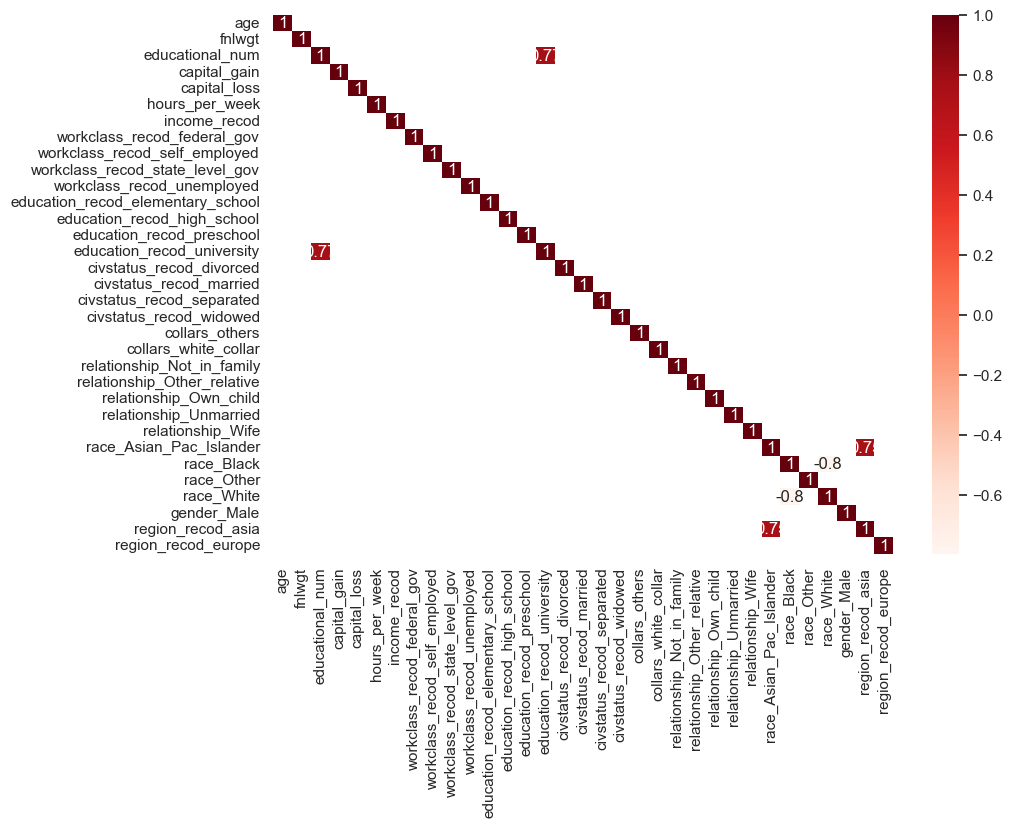

In [29]:
print('El mapa de calor clasifca los vectores con correlación > 0.7. \n Las correlaciones mayores a 0.7 se clasifican como "alta correlacion de acuerdo a la clasificación de Pearson. \n  Más adelante, se analizará si justamente estos vectores tienen la calidad necesaria para ser insertos al modelo')
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[abs(df.corr())>.7], annot=True, cmap="Reds")

***Interpretación de regresores***

El primer modelo utilizó 32 variables regresoras para poder explicar la variable dependiente. Solo 23 resultaron lograron obtener un 95% de confianza, ya que su puntaje Z fue menor a 0.05. El R Cuadrado ajustado, indica que el modelo se ajustó sólo en un 40% de la varianza del campo vector objetivo. En cuanto a los coeficientes que aportan positivamente al modelo, solo 15 resultan mayores a 0 con un 95% de confianza.

El modelo depurado no presentó mejoras, de hecho disminuyó marginalmente la bondad de ajuste.

Al hilar mas fino el resultado, el resumen de depuracion más profunda revela que solo 16 variables cumplen tener un 95% de confianza y tener coeficientes mayores que 0.


***Definición de las estrategias de Modelación predictiva.***

Con el objeto de optimizar el modelo, se trabajarán 3 modelos con los vectores significativos:

    - Modelo con intercepto y sin balanceo de clases

    - Modelo sin intercepto y con balanceo de clases

    - Modelo sin intercepto y sin  balanceo 


    
    

# DESARROLLO  HITO 4 DESAFIO 1 (en proceso)

***● Elementos a considerar en éste hito:***

○ La preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción. (2 puntos)

○ La implementación de por lo menos tres modelos predictivos. (4 puntos)

○ El reporte del mejor modelo predictivo en base a los resultados. (4 puntos)


In [30]:
#Guardo los vectores significantes del modelo depurado y considero el VO, para preparar los modelos.

df_depurado = df[['income_recod','age','fnlwgt','educational_num','capital_gain','capital_loss','hours_per_week','workclass_recod_federal_gov',
                    'workclass_recod_self_employed','civstatus_recod_divorced','civstatus_recod_married','civstatus_recod_separated',
                    'civstatus_recod_widowed','collars_others','collars_white_collar','relationship_Not_in_family','relationship_Other_relative',
                    'relationship_Own_child','relationship_Unmarried','relationship_Wife','race_Asian_Pac_Islander',
                    'race_White','gender_Male','region_recod_asia']]
                


In [31]:

y_vec = df_depurado.loc[:,"income_recod"] #VO
X_mat = df_depurado.loc[:, "age" : "region_recod_asia"] #Matriz
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state = 187608)

In [32]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#Modelo con intercepto y sin balanceo de clases
trainmodel_1 = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

In [34]:
#Modelo sin intercepto y con balanceo de clases
trainmodel_2 = LogisticRegression(fit_intercept=False, class_weight='balanced').fit(X_train, y_train)

In [35]:
#Modelo sin intercepto y sin  balanceo 
trainmodel_3 = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

### Predicciones de clase

In [36]:
prediccion1 = trainmodel_1.predict(X_test) #Modelo con intercepto y sin balanceo de clases
prediccion1[:7]

array([0, 1, 0, 0, 0, 0, 1])

In [37]:
prediccion2 = trainmodel_2.predict(X_test) #Modelo sin intercepto y con balanceo de clases

prediccion2[:7]

array([1, 1, 1, 0, 0, 0, 1])

In [38]:
prediccion3 = trainmodel_3.predict(X_test) #Modelo sin intercepto y sin  balanceo
prediccion3[:7]

array([0, 1, 0, 0, 0, 0, 1])

### Probabilidades

In [39]:
#PREDICCIONES DE PROBABILIDAD
predicted_probs_1 = trainmodel_1.predict_proba(X_test)
predicted_probs_1[:7]

array([[0.65623122, 0.34376878],
       [0.3420303 , 0.6579697 ],
       [0.69507552, 0.30492448],
       [0.99020681, 0.00979319],
       [0.86312231, 0.13687769],
       [0.97709041, 0.02290959],
       [0.30001599, 0.69998401]])

In [40]:
predicted_probs_2 = trainmodel_2.predict_proba(X_test)
predicted_probs_2[:7]

array([[0.35498833, 0.64501167],
       [0.11085468, 0.88914532],
       [0.34748329, 0.65251671],
       [0.94253771, 0.05746229],
       [0.58781743, 0.41218257],
       [0.9064533 , 0.0935467 ],
       [0.10874401, 0.89125599]])

In [41]:
predicted_probs_3 = trainmodel_3.predict_proba(X_test)
predicted_probs_3[:7]

array([[0.60624302, 0.39375698],
       [0.26848286, 0.73151714],
       [0.52925536, 0.47074464],
       [0.93828996, 0.06171004],
       [0.72416934, 0.27583066],
       [0.93958292, 0.06041708],
       [0.23121071, 0.76878929]])

In [42]:
print(classification_report(y_test, prediccion1)) #Modelo con intercepto y sin balanceo de clases

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11240
           1       0.74      0.61      0.67      3684

    accuracy                           0.85     14924
   macro avg       0.81      0.77      0.79     14924
weighted avg       0.84      0.85      0.85     14924



In [43]:
print(classification_report(y_test, prediccion2)) #Modelo sin intercepto y con balanceo de clases

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11240
           1       0.53      0.89      0.66      3684

    accuracy                           0.78     14924
   macro avg       0.74      0.82      0.75     14924
weighted avg       0.85      0.78      0.79     14924



In [44]:
print(classification_report(y_test, prediccion3)) #Modelo sin intercepto y sin  balanceo

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11240
           1       0.64      0.70      0.67      3684

    accuracy                           0.83     14924
   macro avg       0.77      0.79      0.78     14924
weighted avg       0.84      0.83      0.83     14924



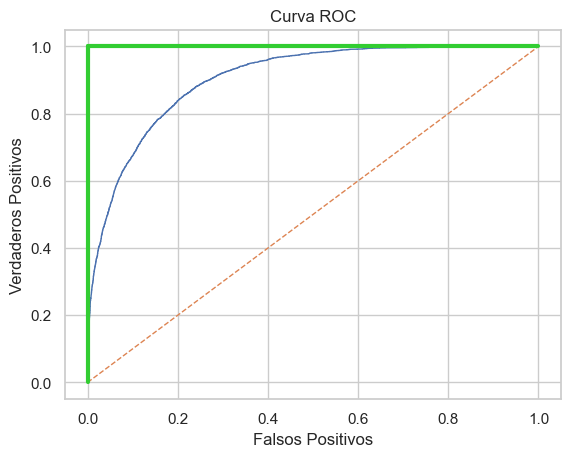

In [45]:
# Utiliza esta celda para graficar la curva ROC
yhat = trainmodel_1.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

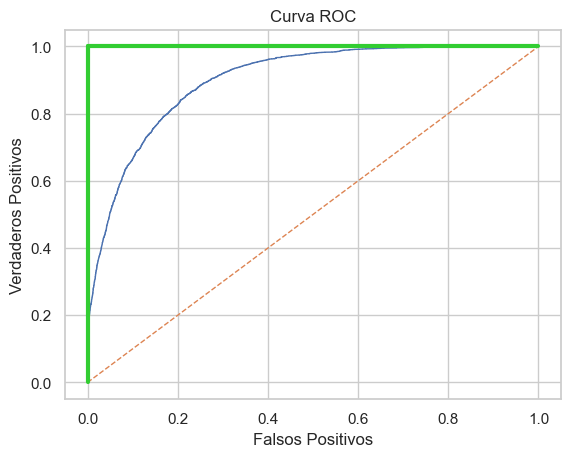

In [46]:
yhat = trainmodel_2.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

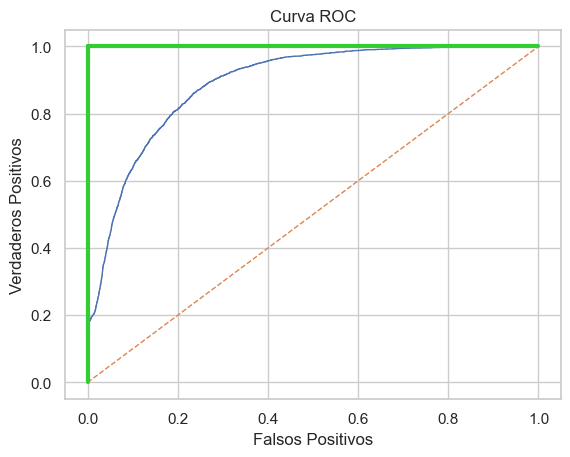

In [47]:
yhat = trainmodel_3.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [48]:
f1 = f1_score(y_test, prediccion1)

print(f"El F1 del modelo entrenado 1 (trainmodel_1) es de {round(f1, 3)}")

auc = roc_auc_score(y_test, predicted_probs_1[:, 1])

print(f"El área bajo la curva ROC es de {round(auc, 5)}")

El F1 del modelo entrenado 1 (trainmodel_1) es de 0.668
El área bajo la curva ROC es de 0.90405


In [49]:
f1 = f1_score(y_test, prediccion2)

print(f"El F1 del modelo entrenado 2 (trainmodel_2) es de {round(f1, 3)}")

auc = roc_auc_score(y_test, predicted_probs_2[:, 1])

print(f"El área bajo la curva ROC es de {round(auc, 5)}")

El F1 del modelo entrenado 2 (trainmodel_2) es de 0.663
El área bajo la curva ROC es de 0.9002


In [50]:
f1 = f1_score(y_test, prediccion3)

print(f"El F1 del modelo entrenado 3 (trainmodel_3) es de {round(f1, 3)}")

auc = roc_auc_score(y_test, predicted_probs_3[:, 1])

print(f"El área bajo la curva ROC es de {round(auc, 5)}")

El F1 del modelo entrenado 3 (trainmodel_3) es de 0.671
El área bajo la curva ROC es de 0.88973


### Conclusiones

 A nivel general los 3 modelos presentan resultados relativamente parecidos basándose en la observacion del classification report.
Si bien los 3 modelos se acercaron a puntuación 0.90 para predecir resultados al vector con clasificación 0 (income < 50.000 usd) existen problemas para predecir resultados para el vector 1 ya que incluso el mejor modelo solo alcanzó una puntuación de 0.67

Las medidas de recall de los 3 modelos fueron:

**modelo1 : 0.60**

modelo2 : 0.89

modelo3 : 0.70

En razón de lo anterior, claramente existen dificultades para el primer modelo de poder clasificar todas las muestras positivas, en comparación al modelo 2 que es de 0.89 .-

Sin embargo, al calcular la media armónica(H) entre precision y recall del modelo de clasificación (F1 Score) el panorama cambia. Se concluye que ***el primer modelo es el que mejor se desempeña*** prediciendo debido a que sus puntajes fueron los mas altos, ponderando:

para el vector 0: 0.90

para el vector 1: 0.61

Además, fue la mayor area bajo la curva de roc, ponderando  0.90405.


